In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

In [2]:

type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\4244551283.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10927,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.965705e+07,1.965705e+07,False,NaN,1,NaN,NaN,None,2024-03-17T23:02:00.000Z,68165.855499,4.742453e+10,6.8539,-0.109370,2.846439,-0.454465,31.059353,59.823134,60.002225,1.339940e+12,51.6815,1.431483e+12,None,2024-03-17T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993
1,1027,Ethereum,ETH,ethereum,8587,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200795e+08,1.200795e+08,True,NaN,2,NaN,NaN,None,2024-03-17T23:02:00.000Z,3642.533347,2.105544e+10,10.1226,0.088638,2.570322,-4.964711,30.551744,44.359941,64.353999,4.373935e+11,16.8343,4.373935e+11,None,2024-03-17T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993
2,825,Tether USDt,USDT,tether,78853,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.034150e+11,1.067928e+11,True,NaN,3,NaN,NaN,None,2024-03-17T22:56:00.000Z,0.999434,9.436775e+10,-4.1767,-0.033185,-0.007196,-0.238629,-0.132943,-0.013458,-0.025398,1.033564e+11,3.9704,1.067323e+11,None,2024-03-17T22:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-17 23:05:26.783993
3,5426,Solana,SOL,solana,639,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.437769e+08,5.719872e+08,True,NaN,4,NaN,NaN,None,2024-03-17T22:53:00.000Z,203.094917,1.108945e+10,-3.2763,3.094386,11.398727,43.526731,85.682777,100.969315,172.960802,9.012884e+10,3.4591,1.161677e+11,None,2024-03-17T22:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993
4,1839,BNB,BNB,bnb,2107,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495385e+08,1.495385e+08,False,NaN,5,NaN,NaN,None,2024-03-17T22:59:00.000Z,577.587418,3.589427e+09,-13.8091,0.843703,-1.342860,11.202951,60.598762,86.107984,140.241885,8.637154e+10,3.3226,8.637154e+10,None,2024-03-17T22:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993
5,52,XRP,XRP,xrp,1260,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.480019e+10,9.998780e+10,False,NaN,6,NaN,NaN,None,2024-03-17T23:02:00.000Z,0.620205,1.928882e+09,-10.1680,0.088389,2.476942,3.152081,9.761078,8.857689,1.402572,3.398733e+10,1.3081,6.202046e+10,None,2024-03-17T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993
6,3408,USDC,USDC,usd-coin,17438,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.083765e+10,3.083765e+10,False,NaN,7,NaN,NaN,None,2024-03-17T22:53:00.000Z,1.000009,1.233507e+10,2.7042,-0.009342,-0.011680,0.000365,0.015721,-0.016107,0.002013,3.083791e+10,1.1843,3.083791e+10,None,2024-03-17T22:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-17 23:05:26.783993
7,2010,Cardano,ADA,cardano,1109,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.556024e+10,3.671464e+10,False,NaN,8,NaN,NaN,None,2024-03-17T22:53:00.000Z,0.683832,8.496169e+08,-7.2517,1.086381,2.458931,-3.650080,15.396346,30.022453,15.057017,2.431722e+10,0.9322,3.077242e+10,None,2024-03-17T22:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993
8,74,Dogecoin,DOGE,dogecoin,930,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\PRALAY\AppData\Local\Temp\ipykernel_8152\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10927,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.965705e+07,1.965705e+07,False,NaN,1,NaN,NaN,None,2024-03-17T23:02:00.000Z,68165.855499,4.742453e+10,6.8539,-0.109370,2.846439,-0.454465,31.059353,59.823134,60.002225,1.339940e+12,51.6815,1.431483e+12,None,2024-03-17T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993,NaT
1,1027,Ethereum,ETH,ethereum,8587,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200795e+08,1.200795e+08,True,NaN,2,NaN,NaN,None,2024-03-17T23:02:00.000Z,3642.533347,2.105544e+10,10.1226,0.088638,2.570322,-4.964711,30.551744,44.359941,64.353999,4.373935e+11,16.8343,4.373935e+11,None,2024-03-17T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993,NaT
2,825,Tether USDt,USDT,tether,78853,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.034150e+11,1.067928e+11,True,NaN,3,NaN,NaN,None,2024-03-17T22:56:00.000Z,0.999434,9.436775e+10,-4.1767,-0.033185,-0.007196,-0.238629,-0.132943,-0.013458,-0.025398,1.033564e+11,3.9704,1.067323e+11,None,2024-03-17T22:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-17 23:05:26.783993,NaT
3,5426,Solana,SOL,solana,639,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.437769e+08,5.719872e+08,True,NaN,4,NaN,NaN,None,2024-03-17T22:53:00.000Z,203.094917,1.108945e+10,-3.2763,3.094386,11.398727,43.526731,85.682777,100.969315,172.960802,9.012884e+10,3.4591,1.161677e+11,None,2024-03-17T22:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993,NaT
4,1839,BNB,BNB,bnb,2107,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495385e+08,1.495385e+08,False,NaN,5,NaN,NaN,None,2024-03-17T22:59:00.000Z,577.587418,3.589427e+09,-13.8091,0.843703,-1.342860,11.202951,60.598762,86.107984,140.241885,8.637154e+10,3.3226,8.637154e+10,None,2024-03-17T22:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993,NaT
5,52,XRP,XRP,xrp,1260,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.480019e+10,9.998780e+10,False,NaN,6,NaN,NaN,None,2024-03-17T23:02:00.000Z,0.620205,1.928882e+09,-10.1680,0.088389,2.476942,3.152081,9.761078,8.857689,1.402572,3.398733e+10,1.3081,6.202046e+10,None,2024-03-17T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993,NaT
6,3408,USDC,USDC,usd-coin,17438,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.083765e+10,3.083765e+10,False,NaN,7,NaN,NaN,None,2024-03-17T22:53:00.000Z,1.000009,1.233507e+10,2.7042,-0.009342,-0.011680,0.000365,0.015721,-0.016107,0.002013,3.083791e+10,1.1843,3.083791e+10,None,2024-03-17T22:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-17 23:05:26.783993,NaT
7,2010,Cardano,ADA,cardano,1109,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.556024e+10,3.671464e+10,False,NaN,8,NaN,NaN,None,2024-03-17T22:53:00.000Z,0.683832,8.496169e+08,-7.2517,1.086381,2.458931,-3.650080,15.396346,30.022453,15.057017,2.431722e+10,0.9322,3.077242e+10,None,2024-03-17T22:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993,NaT
8,74,Dogecoin,DOGE,dogecoin,930,2013-12-15T00:00:00.000Z,"[mineable, pow,

In [18]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10927,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19657050.00000,19657050.00000,False,NaN,1,NaN,NaN,None,2024-03-17T23:02:00.000Z,68165.85550,47424526897.93511,6.85390,-0.10937,2.84644,-0.45447,31.05935,59.82313,60.00223,1339939629841.12451,51.68150,1431482965483.81006,None,2024-03-17T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993,NaT
1,1027,Ethereum,ETH,ethereum,8587,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120079481.71421,120079481.71421,True,NaN,2,NaN,NaN,None,2024-03-17T23:02:00.000Z,3642.53335,21055442179.84162,10.12260,0.08864,2.57032,-4.96471,30.55174,44.35994,64.35400,437393516466.06708,16.83430,437393516466.07001,None,2024-03-17T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993,NaT
2,825,Tether USDt,USDT,tether,78853,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,103414954568.17609,106792815137.11734,True,NaN,3,NaN,NaN,None,2024-03-17T22:56:00.000Z,0.99943,94367747700.46017,-4.17670,-0.03319,-0.00720,-0.23863,-0.13294,-0.01346,-0.02540,103356389944.92892,3.97040,106732337607.44000,None,2024-03-17T22:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-17 23:05:26.783993,NaT
3,5426,Solana,SOL,solana,639,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,443776915.98132,571987170.67027,True,NaN,4,NaN,NaN,None,2024-03-17T22:53:00.000Z,203.09492,11089448767.97824,-3.27630,3.09439,11.39873,43.52673,85.68278,100.96931,172.96080,90128835960.20465,3.45910,116167687007.08000,None,2024-03-17T22:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993,NaT
4,1839,BNB,BNB,bnb,2107,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149538466.96524,149538466.96524,False,NaN,5,NaN,NaN,None,2024-03-17T22:59:00.000Z,577.58742,3589427140.54981,-13.80910,0.84370,-1.34286,11.20295,60.59876,86.10798,140.24189,86371537088.59108,3.32260,86371537088.59000,None,2024-03-17T22:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993,NaT
5,52,XRP,XRP,xrp,1260,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54800189217.00000,99987798943.00000,False,NaN,6,NaN,NaN,None,2024-03-17T23:02:00.000Z,0.62020,1928881656.98447,-10.16800,0.08839,2.47694,3.15208,9.76108,8.85769,1.40257,33987332118.20154,1.30810,62020464899.52000,None,2024-03-17T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-17 23:05:26.783993,NaT
6,3408,USDC,USDC,usd-coin,17438,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30837650469.48614,30837650469.48614,False,NaN,7,NaN,NaN,None,2024-03-17T22:53:00.000Z,1.00001,12335069790.04928,2.70420,-0.00934,-0.01168,0.00037,0.01572,-0.01611,0.00201,30837912850.18343,1.18430,30837912850.18000,None,2024-03-17T22:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-17 23:05:26.783993,NaT
7,2010,Cardano,ADA,cardano,1109,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35560242256.66000,36714635943.04000,False,NaN,8,NaN,NaN,None,2024-03-17T22:53:00.000Z,0.68383,849616868.42406,-7.25170,1.08638,2.45893,-3.65008,15.39635,30.02245,15.05702,24317217064.07888,0.93220,30

In [19]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.17226,3.50078,-0.59950,31.13577,59.96114,60.00402
Ethereum,-0.02243,3.15990,-5.25040,30.40120,44.37996,64.01812
Tether USDt,-0.01241,-0.01163,-0.19295,-0.10150,0.00943,-0.02818
Solana,2.61158,11.98759,42.20641,84.49743,101.00924,170.99544
BNB,-0.03470,-1.48970,9.70182,59.66838,85.51968,138.33837
XRP,-0.18388,2.84411,2.68130,9.65031,8.85433,1.07579
USDC,0.00014,-0.00774,0.00449,0.02347,-0.01963,-0.00374
Cardano,0.64652,2.57611,-3.70045,15.02120,29.69638,14.37352
Dogecoin,-1.14074,9.24069,-8.00630,79.68926,91.84227,67.15707


In [20]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.17226
             quote.USD.percent_change_24h     3.50078
             quote.USD.percent_change_7d     -0.59950
             quote.USD.percent_change_30d    31.13577
             quote.USD.percent_change_60d    59.96114
             quote.USD.percent_change_90d    60.00402
Ethereum     quote.USD.percent_change_1h     -0.02243
             quote.USD.percent_change_24h     3.15990
             quote.USD.percent_change_7d     -5.25040
             quote.USD.percent_change_30d    30.40120
             quote.USD.percent_change_60d    44.37996
             quote.USD.percent_change_90d    64.01812
Tether USDt  quote.USD.percent_change_1h     -0.01241
             quote.USD.percent_change_24h    -0.01163
             quote.USD.percent_change_7d     -0.19295
             quote.USD.percent_change_30d    -0.10150
             quote.USD.percent_change_60d     0.00943
             quote.USD.percent_change_90

In [21]:
type(df4)


pandas.core.series.Series

In [22]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.17226
            quote.USD.percent_change_24h   3.50078
            quote.USD.percent_change_7d   -0.59950
            quote.USD.percent_change_30d  31.13577
            quote.USD.percent_change_60d  59.96114
            quote.USD.percent_change_90d  60.00402
Ethereum    quote.USD.percent_change_1h   -0.02243
            quote.USD.percent_change_24h   3.15990
            quote.USD.percent_change_7d   -5.25040
            quote.USD.percent_change_30d  30.40120
            quote.USD.percent_change_60d  44.37996
            quote.USD.percent_change_90d  64.01812
Tether USDt quote.USD.percent_change_1h   -0.01241
            quote.USD.percent_change_24h  -0.01163
            quote.USD.percent_change_7d   -0.19295
            quote.USD.percent_change_30d  -0.10150
            quote.USD.percent_change_60d   0.00943
            quote.USD.percent_change_90d  -0.02818
Solana      quote.USD.percent_change_1h    2.61158
            quote.USD.percent_change_24h  11.98759
            quote.USD.percent_change_7d   42.20641
            quote.USD.percent_change_30d  84.49743
            quote.USD.percent_change_60d 101.00924
            quote.USD.percent_change_90d 170.99544
BNB         quote.USD.percent_change_1h   -0.03470
            quote.USD.percent_change_24h  -1.48970
            quote.USD.percent_change_7d    9.70182
            quote.USD.percent_change_30d  59.66838
            quote.USD.percent_change_60d  85.51968
            quote.USD.percent_change_90d 138.33837
XRP         quote.USD.percent_change_1h   -0.18388
            quote.USD.percent_change_24h   2.84411
            quote.USD.percent_change_7d    2.68130
            quote.USD.percent_change_30d   9.65031
            quote.USD.percent_change_60d   8.85433
            quote.USD.percent_change_90d   1.07579
USDC        quote.USD.percent_change_1h    0.00014
            quote.USD.percent_change_24h  -0.00774
            quote.USD.percent_change_7d    0.00449
            quote.USD.percent_change_30d   0.02347
            quote.USD.percent_change_60d  -0.01963
            quote.USD.percent_change_90d  -0.00374
Cardano     quote.USD.percent_change_1h    0.64652
            quote.USD.percent_change_24h   2.57611
            quote.USD.percent_change_7d   -3.70045
            quote.USD.percent_change_30d  15.02120
            quote.USD.percent_change_60d  29.69638
            quote.USD.percent_change_90d  14.37352
Dogecoin    quote.USD.percent_change_1h   -1.14074
            quote.USD.percent_change_24h   9.24069
            quote.USD.percent_change_7d   -8.00630
            quote.USD.percent_change_30d  79.68926
            quote.USD.percent_change_60d  91.84227
            quote.USD.percent_change_90d  67.15707
Avalanche   quote.USD.percent_change_1h    1.42269
            quote.USD.percent_change_24h   8.04218
            quote.USD.percent_change_7d   38.39337
            quote.USD.percent_change_30d  43.34664
            quote.USD.percent_change_60d  60.03995
            quote.USD.percent_change_90d  39.84131
Shiba Inu   quote.USD.percent_change_1h   -0.30897
            quote.USD.percent_change_24h  19.42237
            quote.USD.percent_change_7d   -9.23422
            quote.USD.percent_change_30d 200.72413
            quote.USD.percent_change_60d 211.65490
            quote.USD.percent_change_90d 182.57774
Toncoin     quote.USD.percent_change_1h   -0.36701
            quote.USD.percent_change_24h   9.02543
            quote.USD.percent_change_7d   38.38861
            quote.USD.percent_change_30d  80.04353
            quote.USD.percent_change_60d  70.64894
            quote.USD.percent_change_90d  84.23390
Polkadot    quote.USD.percent_change_1h    0.23242
            quote.USD.percent_change_24h   4.24195
            quote.USD.percent_change_7d    0.37083
            quote.USD.percent_change_30d  33.46580
            quote.USD.percent_change_60d  39.05832
            quo

In [23]:
df5.count()


values    90
dtype: int64

In [29]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17226
1,Bitcoin,quote.USD.percent_change_24h,3.50078
2,Bitcoin,quote.USD.percent_change_7d,-0.59950
3,Bitcoin,quote.USD.percent_change_30d,31.13577
4,Bitcoin,quote.USD.percent_change_60d,59.96114
5,Bitcoin,quote.USD.percent_change_90d,60.00402
6,Ethereum,quote.USD.percent_change_1h,-0.02243
7,Ethereum,quote.USD.percent_change_24h,3.15990
8,Ethereum,quote.USD.percent_change_7d,-5.25040
9,Ethereum,quote.USD.percent_change_30d,30.40120


In [30]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17226
1,Bitcoin,quote.USD.percent_change_24h,3.50078
2,Bitcoin,quote.USD.percent_change_7d,-0.59950
3,Bitcoin,quote.USD.percent_change_30d,31.13577
4,Bitcoin,quote.USD.percent_change_60d,59.96114
5,Bitcoin,quote.USD.percent_change_90d,60.00402
6,Ethereum,quote.USD.percent_change_1h,-0.02243
7,Ethereum,quote.USD.percent_change_24h,3.15990
8,Ethereum,quote.USD.percent_change_7d,-5.25040
9,Ethereum,quote.USD.percent_change_30d,30.40120


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

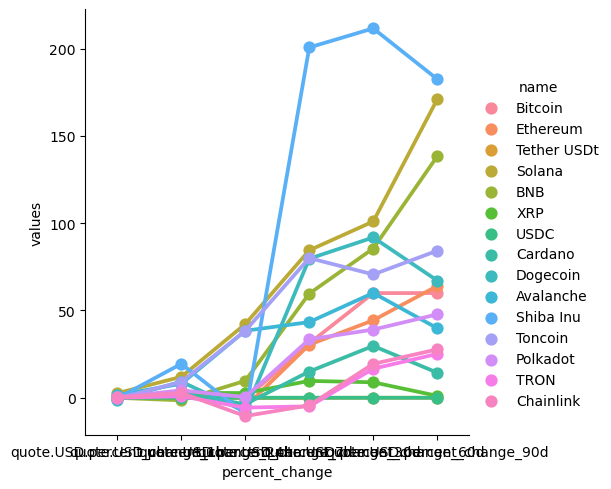

In [32]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [37]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Shiba Inu'")
df10

,name,quote.USD.price,timestamp
10,Shiba Inu,0.00003,2024-03-17 23:05:26.783993
10,Shiba Inu,0.00003,NaT
10,Shiba Inu,0.00003,NaT
10,Shiba Inu,0.00003,NaT
10,Shiba Inu,0.00003,NaT
10,Shiba Inu,0.00003,NaT
10,Shiba Inu,0.00003,NaT
10,Shiba Inu,0.00003,NaT
10,Shiba Inu,0.00003,NaT
10,Shiba Inu,0.00003,NaT


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

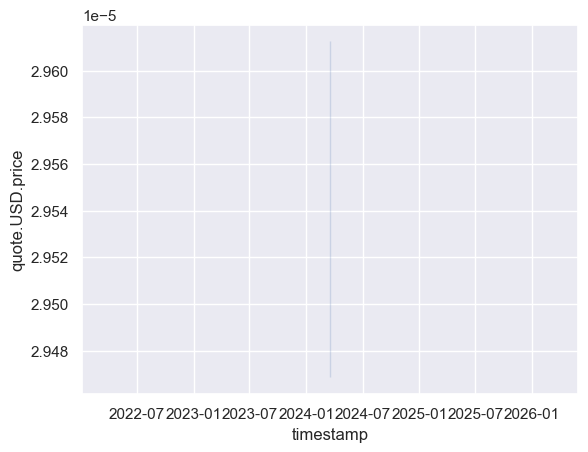

In [42]:


sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)